## Machine Learning - Ex.8


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### PCA


Implement the PCA algorithm as presented in class.

Input: 
1) a matrix ```X``` of size $n\times d$ (representing $n$ samples in $d$-dimensions) 
2) a parameter $k\leq d$ (the target's dimension).

Output: 
1) a matrix ```Z``` of size $n\times k$ (the reduced representation of the data)
2) a matrix ```U``` of size $d\times k$ (with the $k$ eigenvectors as its coloumns)
3) a vector ```evls``` of size $k$ (with the corresponding $k$ eigenvalues)

hint: use ```numpy.linalg.eig``` function


In [2]:
def preprocessPCA(X):
    mu = np.mean(X,axis=0)
    return X - mu,mu
def PCA(X,k,debugPrint = False):
    # your code here.. 
    zero_mean_X = preprocessPCA(X)[0]
    C = zero_mean_X.T.dot(zero_mean_X)/zero_mean_X.shape[0]
    evls,U = np.linalg.eig(C)
    k_needed = (-evls).argsort()[:k]
    take_U = U[:,k_needed]
    take_evls = evls[k_needed]
    if(debugPrint):
        print("debug PCA")
        print(U)
        print(evls)
        print("end debug PCA")
        print("PCA Take debug")
        print(take_U)
        print(take_evls)
        print("end Take debug PCA")
    Z = zero_mean_X.dot(take_U)
    return Z, take_U, take_evls,evls
def reconstructZtoX(Z,U,mu):
    return np.outer(Z,U) + mu

### warm up: 2-D example

Load the data in: ```ex8_data1.csv```, and plot the sample points.

Use PCA to project the data into a 1-D representation: $$\vec{x_i}\in R^2\ \rightarrow\ z_i\in R$$

Project the values of $\{z_i\}$ back into 2-D (reconstruction): 
$$\hat{x_i}=z_i\cdot \vec{u_0}$$

and plot the reconstructed points together with the original points (use different colors).

Try to add small lines, between each point and its corresponding reconstruction.



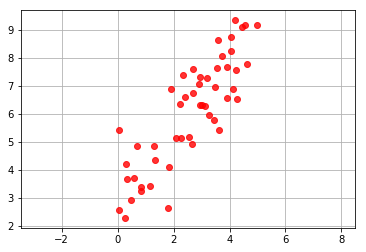

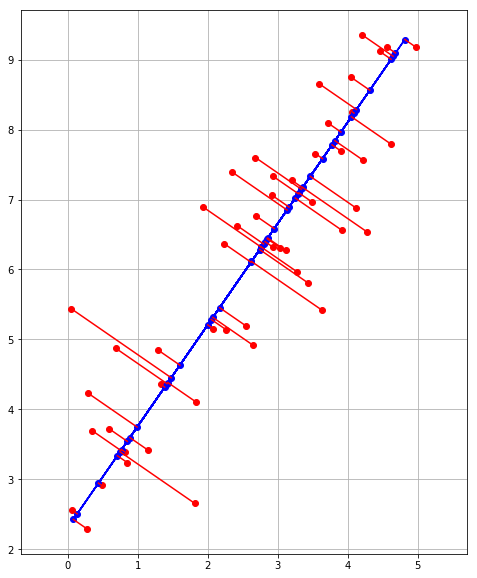

In [3]:
X = np.loadtxt('ex8_data1.csv', delimiter=',')
n = X.shape[0]
plt.plot(X[:,0],X[:,1],'or',alpha=0.8)
plt.axis('equal')
plt.grid()
plt.show()


# your code here.. 
Z,U,evls,full_evls = PCA(X,1)
X_HAT = reconstructZtoX(Z,U,np.mean(X,axis=0))
plt.figure(figsize=(8,10))
plt.plot(X[:,0],X[:,1],'or')
plt.plot(X_HAT[:,0],X_HAT[:,1],'-ob')
AXIS_0 = (X[:,0],X_HAT[:,0])
AXIS_1 = (X[:,1],X_HAT[:,1])
plt.plot(AXIS_0,AXIS_1 ,'-r')
plt.grid()
plt.axis('equal')
plt.show()


### going higher: 8-D example

Load the data in: ```ex8_data2.csv``` and plot the data.
Can you see from the plot any underlying structure?


Next, plot the data using **all** the combinations of any two features, for examples:

- ```plt.plot(X[:,0],X[:,1],'.')```
- ```plt.plot(X[:,0],X[:,5],'.')```
- ```plt.plot(X[:,2],X[:,4],'.')```

(use a large figure with $8\times 8$ subplots..)

Can you see now any underlying structure?


Finally, use PCA to project the data into 2-D, and plot the results in the lower dimension:
- ```plt.plot(Z[:,0],Z[:,1],'.')```

Can you see now the underlying structure?


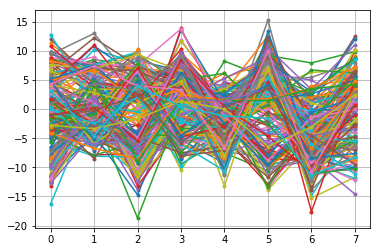

very hard to detect a pattern


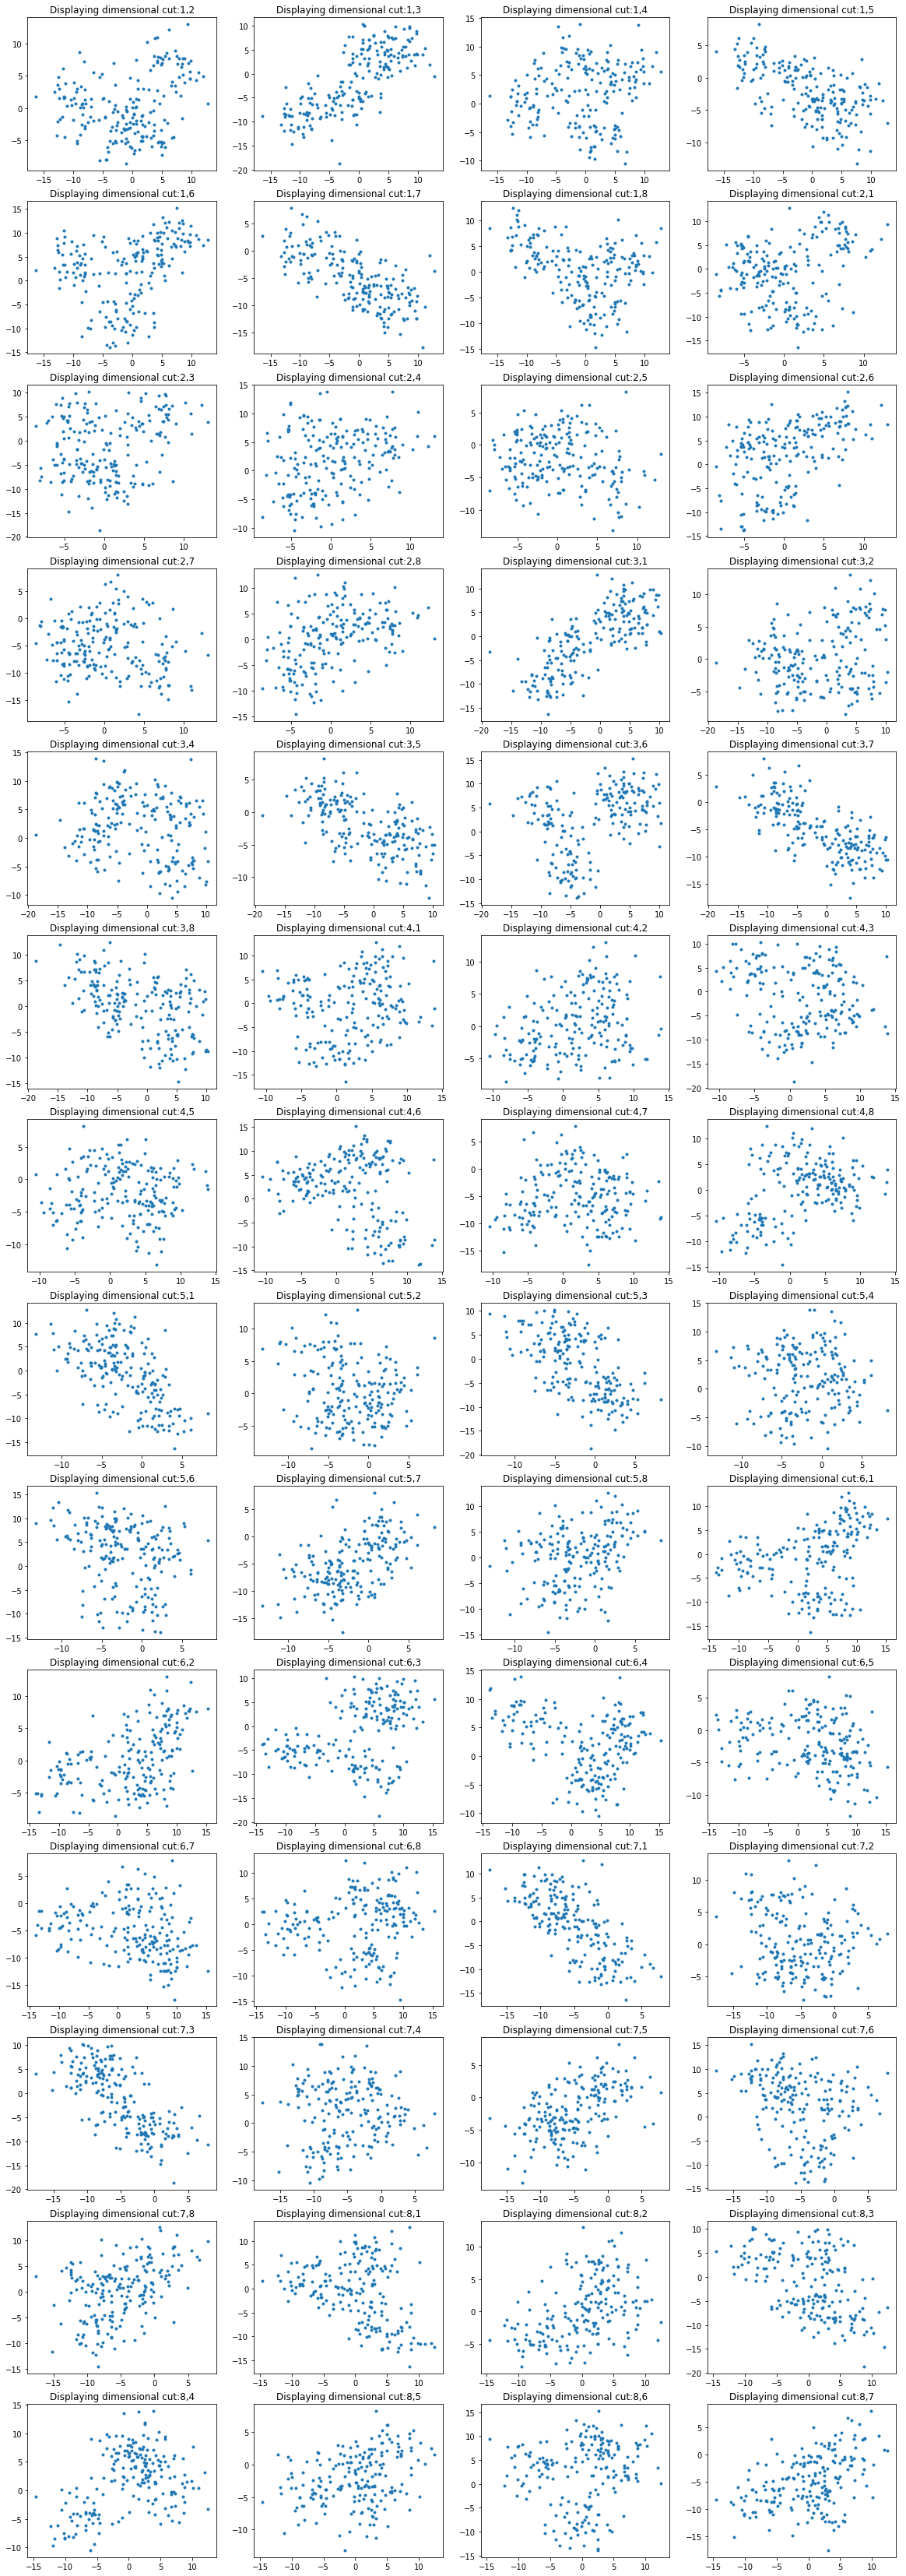

Some clusters appear in several of the cuts


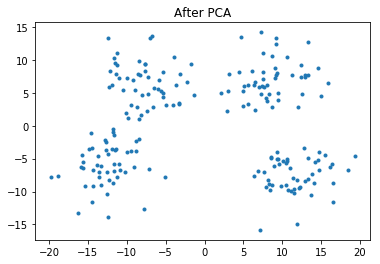

Can easily identify 4 clusters in the data


In [4]:
X=np.loadtxt('ex8_data2.csv', delimiter=',')
d = X.shape[1]
plt.plot(X.T,'.-')
plt.grid()
plt.show()
print("very hard to detect a pattern")
# your code here.. 
plotCounter = 1
plt.figure(figsize=(20,60))
for i in range(0,d):
    for j in range(0,d):
        if(i == j):
            continue
        plt.subplot(14,4,plotCounter)
        plt.title('Displaying dimensional cut:{},{}'.format(i+1,j+1))
        plt.plot(X[:,i],X[:,j],'.')
        plotCounter = plotCounter + 1
plt.show()
print("Some clusters appear in several of the cuts")
#using PCA now..
Z,U,evls,full_evels = PCA(X,2)
plt.title('After PCA')
plt.plot(Z[:,0],Z[:,1],'.')
plt.show()
print("Can easily identify 4 clusters in the data")


### and even higer: 64-D example

Use the DIGITS dataset (presented already in Ex.4).

Use PCA to project the data from 64-D to 2-D. 

1. Plot the results as points in 2-D. Use the given labels (0,1,..,9) to color the samples in different colors.

2. How much of the total variability (of the original data) is captured by this 2-D representation?

3. What is the minimal dimension $k$ needed to capture at least 80% of the original variability?

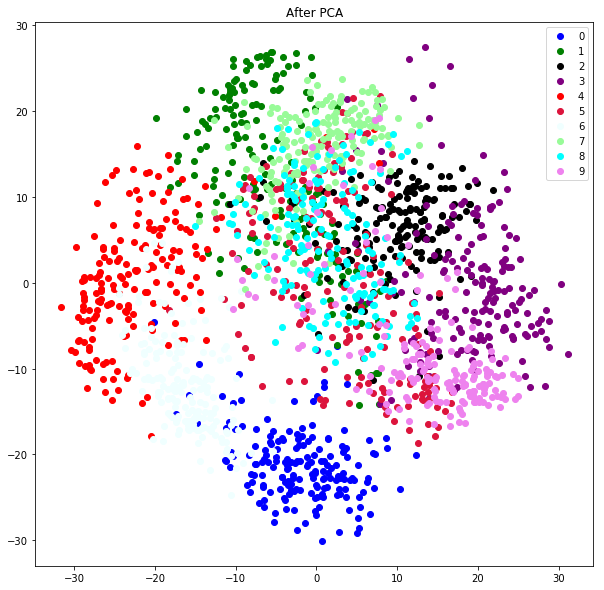

PCA was able to attain 28.50936482369925% of total variability after reduction to 2-D 


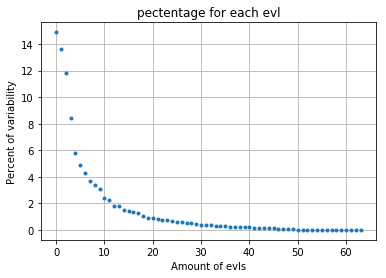

In order to attain at least 80% of the total variability PCA will need to reduct the data dimensionality to 26 dimensions or more


In [5]:
# your code here.. 
from sklearn import datasets
digits = datasets.load_digits() # load the dataset
X = digits.data
Y = digits.target
#Projecting to 2-D  via PCA
Z,U,evls,full_evls = PCA(X,2)
plt.figure(figsize=(10,10))
plt.title('After PCA')
clrs = ['blue','green','black','purple','red','crimson','azure','palegreen','aqua','violet']
for i in range (0,10):
    plt.plot(Z[Y == i,0], Z[Y == i,1], marker='o', label=i,linestyle='none',color=clrs[i])
plt.legend()
plt.show()
allEvlsSum = np.sum(full_evls)
capturedPercent = (np.sum(evls)/allEvlsSum)*100
print("PCA was able to attain {}% of total variability after reduction to 2-D ".format(capturedPercent))
percentForEach = (full_evls/allEvlsSum)*100
plt.title("pectentage for each evl")
plt.xlabel('Amount of evls')
plt.ylabel('Percent of variability')
plt.plot(range(0,percentForEach.shape[0]),percentForEach,'.')
plt.grid()
plt.show()
totalPercentage = 0
countNeededEvls = 0
while(totalPercentage < 80):
    totalPercentage += percentForEach[i]
    countNeededEvls = countNeededEvls + 1
print("In order to attain at least 80% of the total variability PCA will need to reduct the data dimensionality to {} dimensions or more".format(countNeededEvls))
    

## Good luck !